# Solution forThe n-queens problem

In [1]:
import sys
import numpy as np
sys.setrecursionlimit(10**6)
import matplotlib.pyplot as plt

## Helper Functions
We will start by defining a function that places a queen in a particular position of (row, column) and mark the tiles that the queen can attack. Another function is defined to find the diagonals around the queens position inside the board.

the queens position is going to be marked with a -1 value and the tiles she can attack are marked with 1.

In [2]:
def in_board(pos_x, pos_y, size):
    truth_y = 0<= pos_x < size
    truth_x = 0<= pos_y < size
    return truth_x and truth_y

def queen_placer(pos, board):
    board[pos] = -1
    size = board.shape[0]
    pos_y, pos_x = pos
    diagonals = [(pos_y+i, pos_x+i) for i in range(-1*size, size+1) if in_board(pos_y + i, pos_x+i, size)] + [(pos_y-i, pos_x+i) for i in range(-1*size, size+1) if in_board(pos_y - i, pos_x+i, size)]
    for i in diagonals:
        board[i] = 1
    board[pos_y,:] = 1
    board[:,pos_x] =1
    board[pos] = -1
    return board

We will test this function by placing a queen at row = 1, column = 1 on a 4x4 board.board = np.zeros((size,size))

In [3]:
board = np.zeros((4,4))
queen_placer((1,1), board)

array([[ 1.,  1.,  1.,  0.],
       [ 1., -1.,  1.,  1.],
       [ 1.,  1.,  1.,  0.],
       [ 0.,  1.,  0.,  1.]])

## Defining the solver function
Only one queen can be placed in each row, otherwise the second queen in the row could be attacked by the first. Therefore, we need to solve the board in a row by row fasion to find the placement of each queen in each row.

This problem is solved recursively by the propagation and backtracking technique. in the propagation step, we mark all the unsafe positions on the board and remove them from consideration. we start by position 0,0 and continue our search until we find a solution. this marking is achieved by the queen_placer function as we demonstrated before.

This is how backtracking works, consider we are in the middle of solving the problem. once we solve row i we move to row i+1 and evaluate the board. if there are safe positions for a queen to be placed, we try one of them and move to i + 2. If no safe positions exist, we move back to row i and try one of the other available positions. if we exhasted all the options in row i and we cannot proceed we move back one step to row i - 1 and try a different position and so on.

The solver function keeps track of all the positions it tried in the blacklist dictionary so it knows to avoid options that have been already explored. once the function back tracks one step, the blacklist record for the last row is deleted so it can be freely explored from the begining. Also, the function keeps the current queens' positions in a list called q_coordinates.

The base case is achieved once the length of q_coordinates is equal to the number of rows, in other words one queen was successfully placed in every row.

In [4]:
def solver_function(size, q_coordinates = [], blacklist = {}):
    if size == len(q_coordinates):
        return q_coordinates
    if blacklist == {}:
        blacklist = {row:[] for row in range(0, size)}
    board = np.zeros((size,size))
    for pos in q_coordinates:
        board = queen_placer(pos , board)
    row = len(q_coordinates)
    for index, element in enumerate(board[row,:]):
        if element == 0. and not index in blacklist[row]:
            col = index
            blacklist[row].append(index)
            break
    try:
        q_coordinates.append((row, col))
    except:
        if len(q_coordinates) > 0:
            q_coordinates.pop(-1)
        if len(q_coordinates) > 0:
            q_coordinates.pop(-1)
        blacklist[row] = []
        q_coordinates = solver_function(size, q_coordinates,  blacklist)
    if size == len(q_coordinates):
        return q_coordinates
    elif 0. in board[row+1,:]:
        q_coordinates = solver_function(size, q_coordinates,  blacklist)
        return q_coordinates
    else:
        if len(q_coordinates) > 0:
            q_coordinates.pop(-1)
        if len(q_coordinates) > 0:
            q_coordinates.pop(-1)
        blacklist[row] = []
        q_coordinates = solver_function(size, q_coordinates,  blacklist)
        return q_coordinates

## Solving the problem on board sizes = 4 .. 20


In [5]:
for size in range(4,21):
    q_coordinates = solver_function(size, q_coordinates = [], blacklist = {})
    print(f'For board size = {size}x{size}. The solution is {str(q_coordinates)}')

For board size = 4x4. The solution is [(0, 1), (1, 3), (2, 0), (3, 2)]
For board size = 5x5. The solution is [(0, 0), (1, 2), (2, 4), (3, 1), (4, 3)]
For board size = 6x6. The solution is [(0, 2), (1, 5), (2, 1), (3, 4), (4, 0), (5, 3)]
For board size = 7x7. The solution is [(0, 0), (1, 2), (2, 4), (3, 6), (4, 1), (5, 3), (6, 5)]
For board size = 8x8. The solution is [(0, 0), (1, 4), (2, 7), (3, 5), (4, 2), (5, 6), (6, 1), (7, 3)]
For board size = 9x9. The solution is [(0, 1), (1, 5), (2, 0), (3, 6), (4, 3), (5, 7), (6, 2), (7, 4), (8, 8)]
For board size = 10x10. The solution is [(0, 0), (1, 5), (2, 9), (3, 2), (4, 6), (5, 8), (6, 3), (7, 1), (8, 4), (9, 7)]
For board size = 11x11. The solution is [(0, 1), (1, 6), (2, 4), (3, 9), (4, 0), (5, 5), (6, 3), (7, 10), (8, 7), (9, 2), (10, 8)]
For board size = 12x12. The solution is [(0, 0), (1, 2), (2, 6), (3, 10), (4, 1), (5, 11), (6, 9), (7, 5), (8, 3), (9, 8), (10, 4), (11, 7)]
For board size = 13x13. The solution is [(0, 0), (1, 2), (2, 

## Timing the function
The function is called 10 times for each board size ranging from 4 to 20 and the running time is averaged across the 10 times.

In [6]:
import timeit, functools
times = []
for i in range(4, 21):
    t = timeit.Timer(functools.partial(solver_function, i))
    elapsed_time = t.timeit(10)/10
    times.append(elapsed_time)

The running time for each n value in seconds:

For 4x4, Time taken = 1.60e-05 s
For 5x5, Time taken = 3.83e-06 s
For 6x6, Time taken = 5.65e-05 s
For 7x7, Time taken = 6.28e-06 s
For 8x8, Time taken = 6.44e-04 s
For 9x9, Time taken = 9.76e-06 s
For 10x10, Time taken = 2.35e-03 s
For 11x11, Time taken = 4.87e-03 s
For 12x12, Time taken = 1.70e-03 s
For 13x13, Time taken = 2.94e-03 s
For 14x14, Time taken = 1.22e-02 s
For 15x15, Time taken = 7.85e-04 s
For 16x16, Time taken = 2.49e-02 s
For 17x17, Time taken = 2.12e-02 s
For 18x18, Time taken = 6.50e-02 s
For 19x19, Time taken = 3.17e-05 s
For 20x20, Time taken = 4.65e-02 s


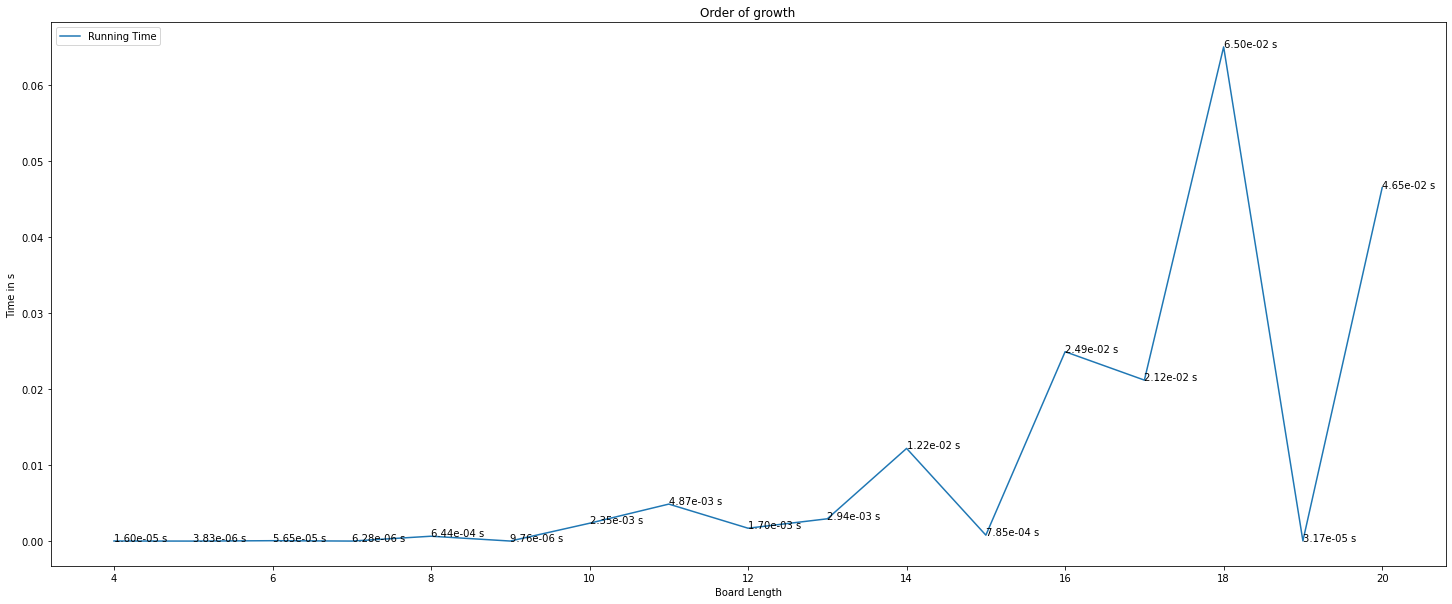

In [7]:
x = list(range(4,21))
print('The running time for each n value in seconds:\n')
times_formated_list = []
for size, time in zip(range(4,21), times):
    time = "{:.2e}".format(time) + ' s'
    times_formated_list.append(time)
    print(f'For {size}x{size}, Time taken = {time}')
fig, ax = plt.subplots(figsize=(25,10))
plt.plot(x,times, label="Running Time")
for a, b, c in zip(x, times, times_formated_list): 
    plt.text(a, b, c)
plt.xlabel('Board Length')
plt.ylabel('Time in s') 
plt.title('Order of growth')
plt.legend(loc="upper left")

## Visualizing the Soltions
We will make a Chessboard class which will help us visualiz

In [8]:
class ChessBoard:
    def __init__(self, size):
        board = np.zeros((size,size))
        board[1::2,0::2] = 1
        board[0::2,1::2] = 1
        self.board = board
        self.size = size

    def make_board(self):
        fig, ax = plt.subplots(figsize=(10,10))
        ax.imshow(self.board, cmap='binary')
        ticks = [i for i in range(0, self.size)]
        ax.set(xticks = ticks, yticks = ticks)
        self.ax = ax

    def display(self, q_coordinates):
        fontsize = 100 - self.size*4 if 100 - self.size*4 > 10 else 15
        self.make_board()
        ax = self.ax
        for i in q_coordinates:
            ax.text(i[1], i[0],'♕', fontsize=fontsize, ha='center', va='center', color='black' if (i[0] - i[1]) % 2 == 0 else 'white')
        return ax


 Solution to 4x4 



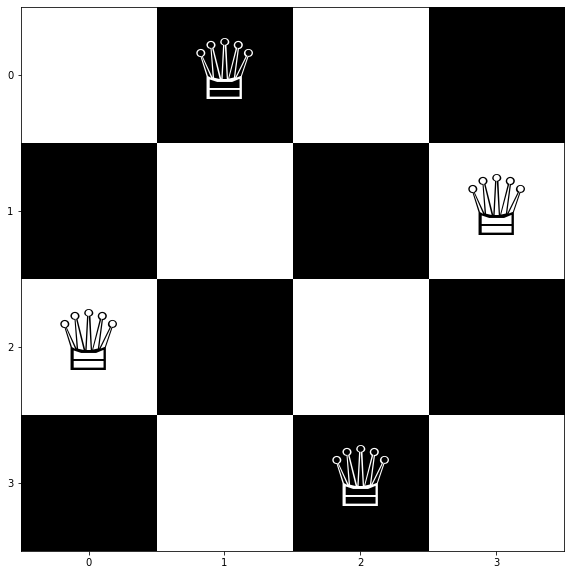


 ----------- 


 Solution to 5x5 



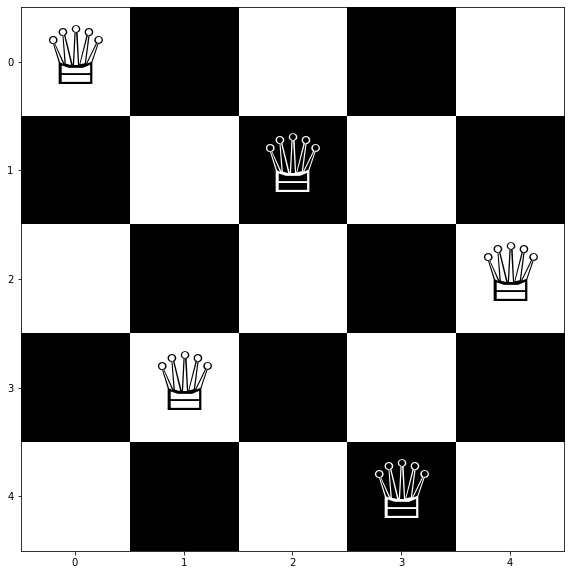


 ----------- 


 Solution to 6x6 



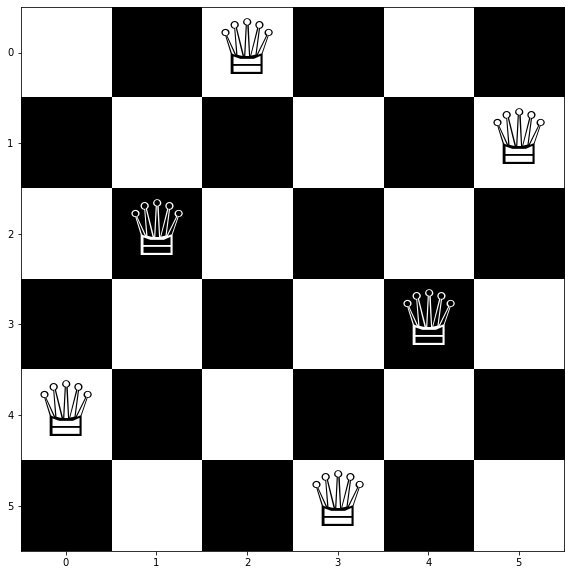


 ----------- 


 Solution to 7x7 



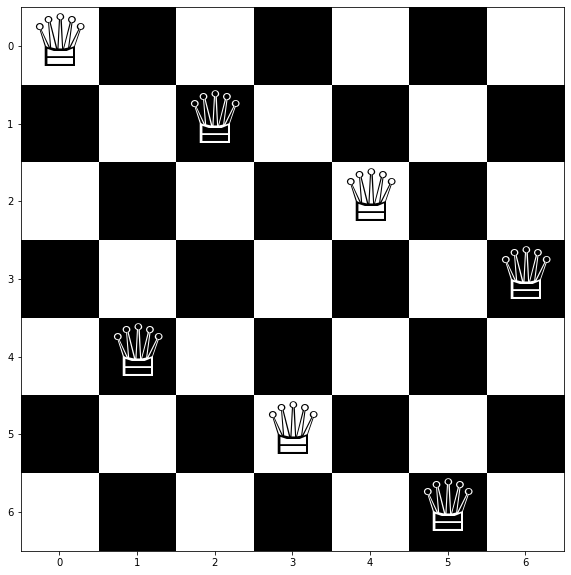


 ----------- 


 Solution to 8x8 



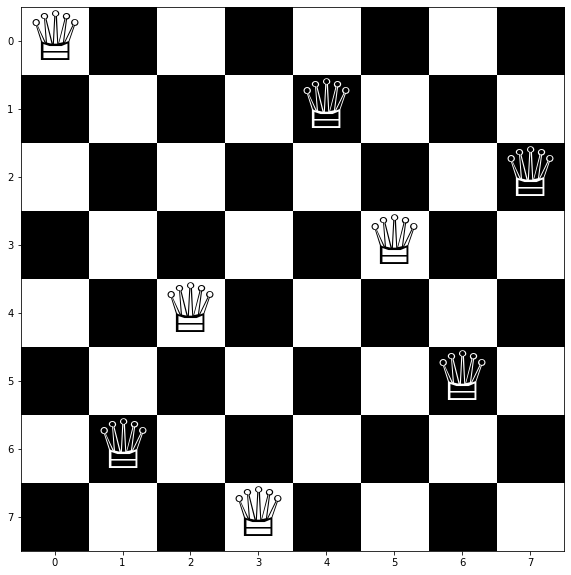


 ----------- 


 Solution to 9x9 



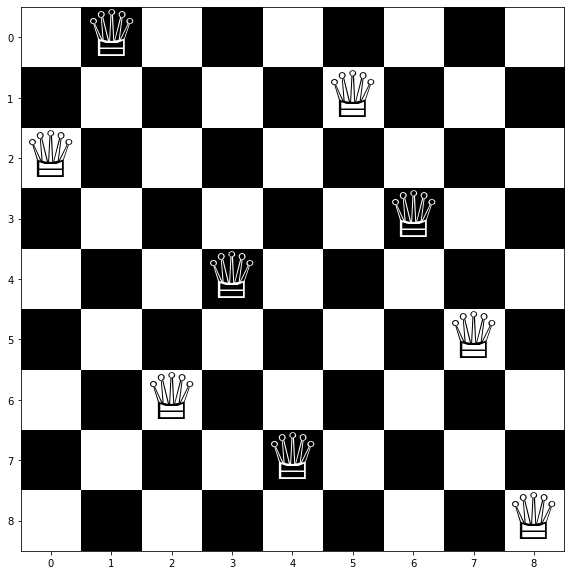


 ----------- 


 Solution to 10x10 



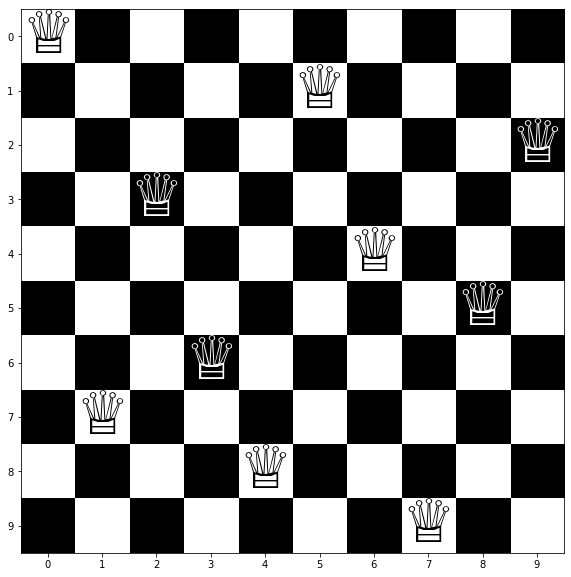


 ----------- 


 Solution to 11x11 



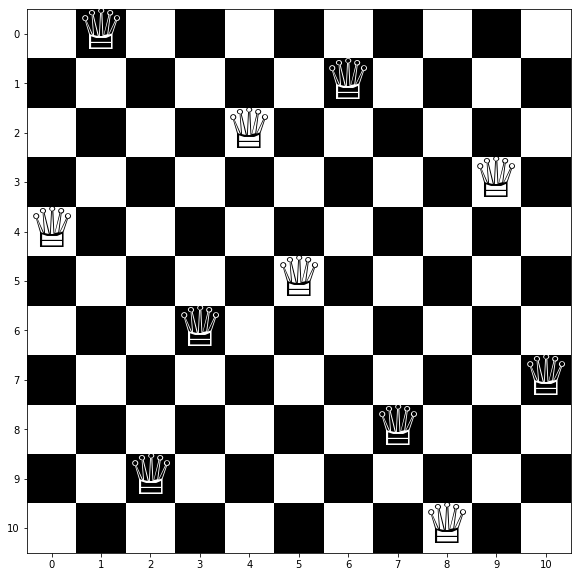


 ----------- 


 Solution to 12x12 



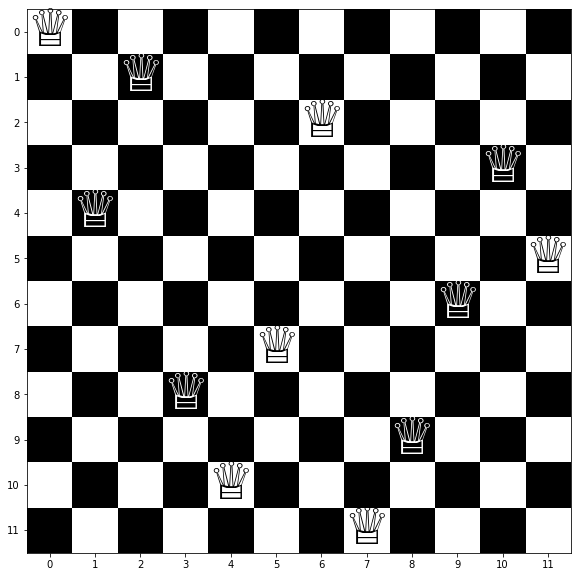


 ----------- 


 Solution to 13x13 



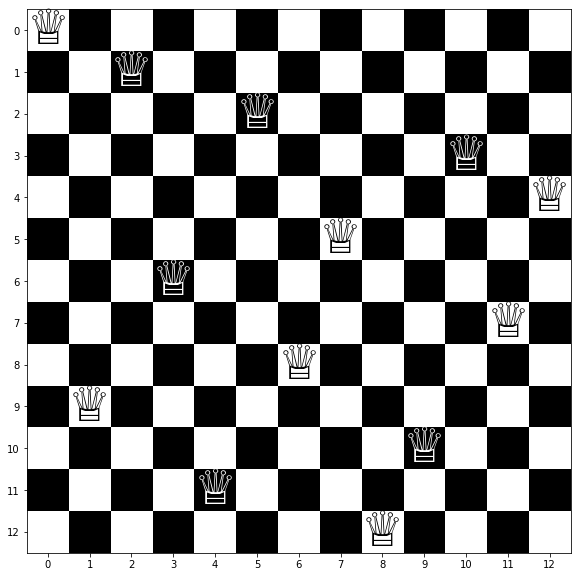


 ----------- 


 Solution to 14x14 



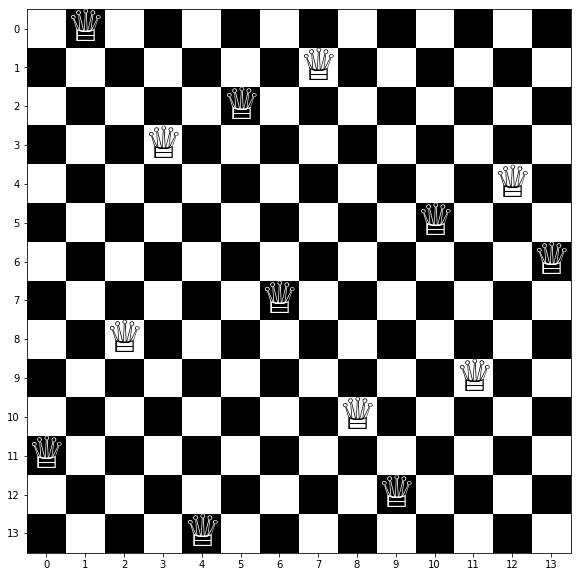


 ----------- 


 Solution to 15x15 



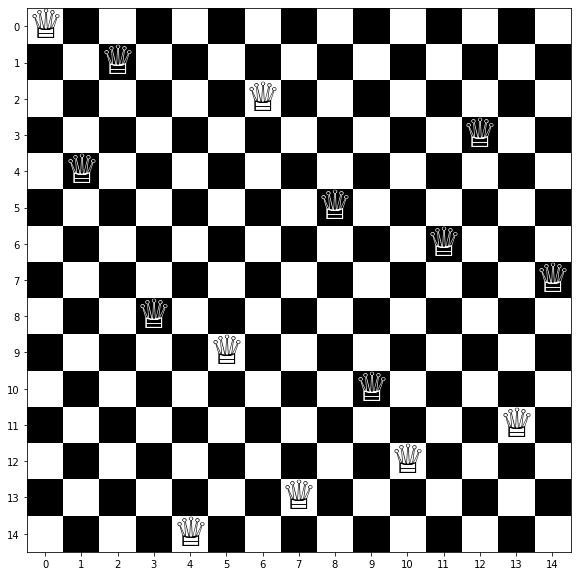


 ----------- 


 Solution to 16x16 



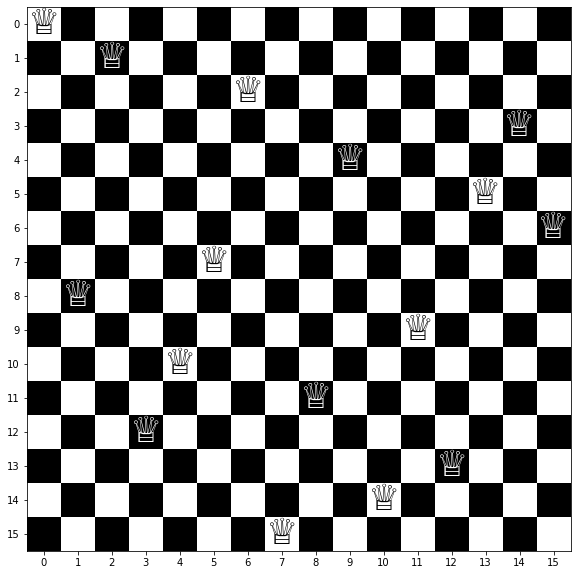


 ----------- 


 Solution to 17x17 



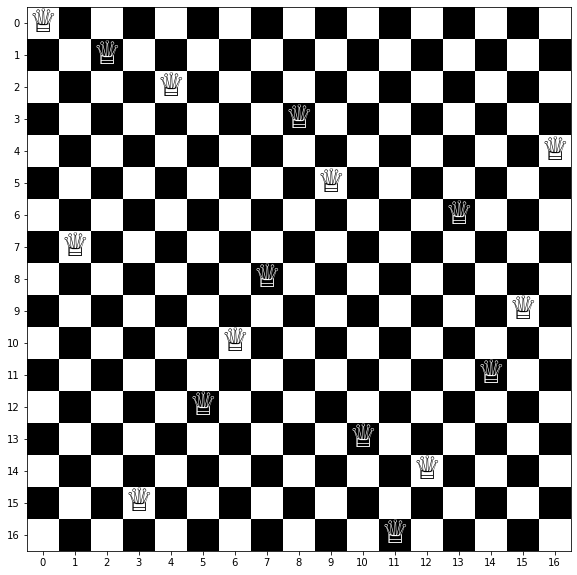


 ----------- 


 Solution to 18x18 



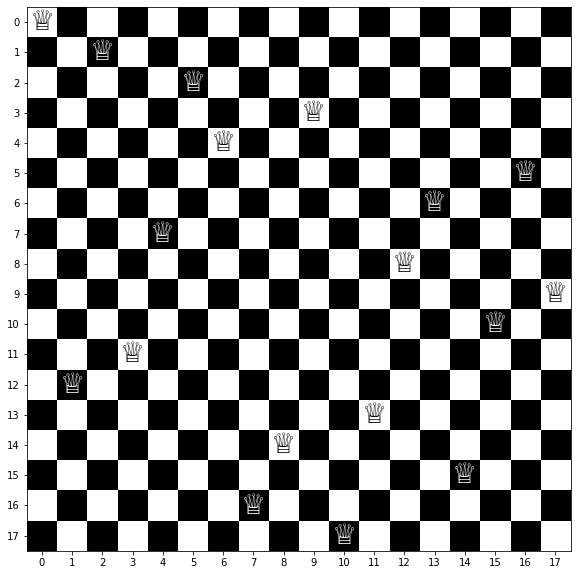


 ----------- 


 Solution to 19x19 



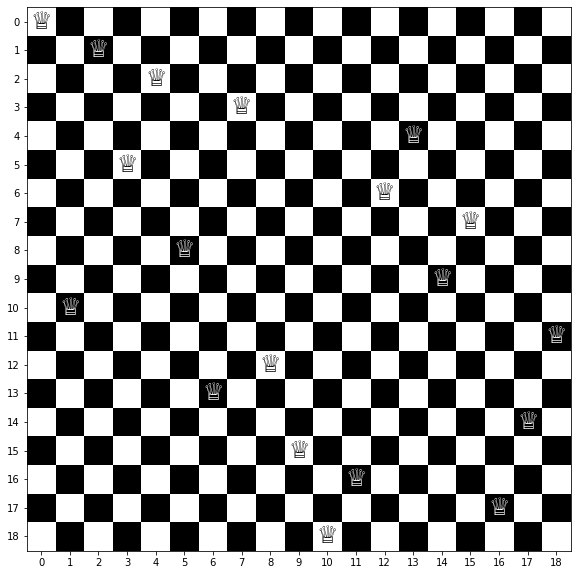


 ----------- 


 Solution to 20x20 



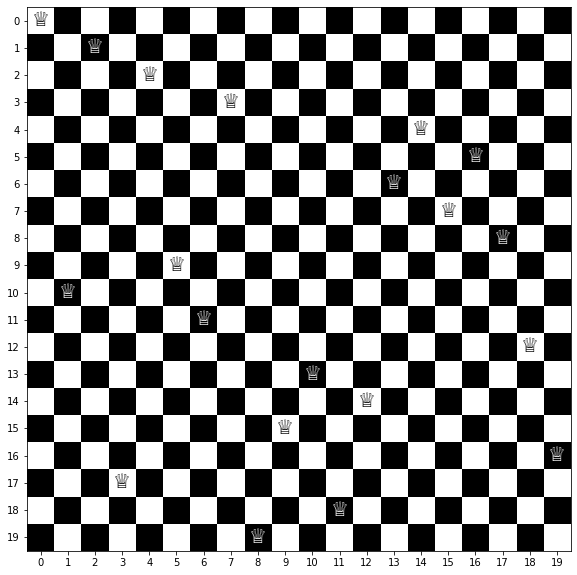


 ----------- 



In [9]:
for size in range(4,21):
    q_coordinates = solver_function(size, q_coordinates = [], blacklist = {})
    chessBoard = ChessBoard(size)
    ax = chessBoard.display(q_coordinates)
    print('\n', f'Solution to {size}x{size}', '\n')
    plt.show(ax)
    print('\n', ''.join(['-' for i in range(11)]), '\n')
   